# Analyzing Tabular Data with Pandas

In many analyses, it is useful to organize data in a tabular format.
Tables are great because they allow us to store heterogeneous data and
assign names to columns which makes exploration more intuitive. The most
popular library for working with tabular data in Python is called
`pandas` which derives from **pan**el **da**ta. In this section we are
going to learn how to use `pandas` and how it interfaces with other
tools to create a powerful ecosystem for data analysis. At the core of
pandas is the `DataFrame` - an object that stores two-dimensional
tabular data. Variables that store data frames are commonly called `df`.
Most of pandas functionality come as so-called methods of the data frame
object. Methods are called by typing the variable name and the method
name separated by a dot. For example: `df.head()` will call the
`.head()` method of the data frame `df`. If you are not used to this
syntax, don’t worry - all sections contain examples for how the
respective methods are used.

Execute the cell below to install the packages required for this
notebook.

In [1]:
# !pixi add pandas seaborn pingouin

## 1 Reading and Writing Tabular Data

There are many different file formats for tabular data that pandas
supports (for a full list, see [this
website](https://pandas.pydata.org/docs/user_guide/io.html)). One of the
most commonly used formats is CSV which stands for comma-separated
values. A CSV file contains plain text where items are separated by
commas. Because it is plain text, CSV is independent of the programming
language which makes it a useful interoperable standard. In this
section, we are going to learn how to read data from a CSV file into
`pandas` and how to write it back to the CSV format.

| Code | Description |
|------------------------------------|------------------------------------|
| `import pandas as pd` | Import the `pandas` module under the alias `pd` |
| `df = pd.read_csv("mydata.csv")` | Read the file `"mydata.csv"` into a pandas data frame and assign it to the variable `df` |
| `df.head(5)` | Get the first 5 rows of `df` |
| `df.to_csv("mydata.csv")` | Write the data frame `df` to the file `"mydata.csv"` |

<span class="theorem-title">**Exercise 1**</span> Import the `pandas`
library under the alias `pd`.

In [2]:
import pandas as pd

<span class="theorem-title">**Exercise 2**</span> Read the file
`salaries.csv` into a data frame and assign it to a variable called
`df`.

In [3]:
df = pd.read_csv('salaries.csv')

<span class="theorem-title">**Exercise 3**</span> Print the first 3 rows
of the data frame `df`.

In [4]:
df.head(3)

,Name,Age,City,Salary,Department
0,Alice,25,New York,75000,Marketing
1,Bob,30,San Francisco,85000,Engineering
2,Charlie,35,Chicago,92000,Sales


<span class="theorem-title">**Exercise 4**</span> Get the first 3 rows
of `df` and assign them to another variable called `new_df`. Write
`new_df` to a file called `new_salaries.csv`.

In [5]:
new_df = df.head(3)
new_df.to_csv('new_salaries.csv')

## 2 Exploring a Data Set in Pandas

Now that we know how to read CSV files, we can start working with some
actual data! In this section, we are going to analyze demographic data
from passengers of the Titanic which are stored in the file
`titanic.csv`. Once we have loaded the data into a data frame, we can
access a given column by providing its name as a string inside square
brackets. For example, `df["age"]` will return the column `"age"` in the
data frame `df`. By extracting individual columns and using methods like
`.max()` or `.mean()`, one can quickly get an overview of the data
stored in a table.

| Code | Description |
|------------------------------------|------------------------------------|
| `df["var1"]` | Get the column with the name `"var1"` in `df` |
| `df["var1"].min()` | Get the minimum value of column `"var1"` |
| `df["var1"].max()` | Get the maximum value of column `"var1"` |
| `df["var1"].mean()` | Compute the mean value of column `"var1"` |
| `df["var1"].unique()` | Get all unique values of column `"var1"` |
| `df["var1"].value_counts()` | Get the count of all unique values of column `"var1"` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 6**</span> Read the file
`titanic.csv` into a pandas data frame and assign it to the variable
`df`. Display the first three rows of the dataframe.

In [6]:
df = pd.read_csv('titanic.csv')
df.head(3)

,survived,pclass,sex,age,fare,embark_town,deck
0,0,3,male,22.0,7.2500,Southampton,NaN
1,1,1,female,38.0,71.2833,Cherbourg,C
2,1,3,female,26.0,7.9250,Southampton,NaN


<span class="theorem-title">**Exercise 7**</span> Get the column
`"survived"` from `df`.

In [7]:
df['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

<span class="theorem-title">**Exercise 8**</span> What is the mean
`"fare"` that passengers on the Titanic paid?

In [8]:
df['fare'].mean()

np.float64(32.204207968574636)

<span class="theorem-title">**Exercise 9**</span> What is the mean
`"age"` of passengers on the Titanic?

In [9]:
df['age'].mean()

np.float64(29.69911764705882)

<span class="theorem-title">**Exercise 10**</span> What is the minimum
and maximum `"age"` of the Titanic’s passengers?

In [10]:
df['age'].max(), df['age'].min()

(np.float64(80.0), np.float64(0.42))

<span class="theorem-title">**Exercise 11**</span> What are the
different `"deck"`s on the Titanic?

In [11]:
df['deck'].unique()

<StringArray>
[nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Length: 8, dtype: str

<span class="theorem-title">**Exercise 12**</span> What is the
most common `"embark_town"` for passengers of the Titanic? *Hint*: The `value_counts()` function may be useful here.

In [12]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

## 3 Indexing and Filtering a Data Frame

Sometimes, we want to access elements in specific elements in a data
frame. This can be done by using the `df.loc` attribute which gets the
data located at a specific index. The index of a data frame is the
unnamed column you see on the very left. By combining indices and column
names, `df.loc` can get the value stored at a specific index, in a
specific column. Also, just like arrays, a data frame can be filtered
using Boolean masks. The process is exactly the same: you create a mask
of `True` and `False` values by applying a logical condition to a data
frame. Then, you apply it to the data frame to extract the values where
the mask equals `True`. One can also combine indexing and filtering by
using the mask as an input for `df.loc`. In this section, we will use
indexing and filtering to do simple statistical analyses of the Titanic
data.

| Code | Description |
|------------------------------------|------------------------------------|
| `mask = df["var1"]=="a"` | Create a `mask` of Boolean values that is `True` where the value of column `"var1"` is `"a"` and `False` otherwise |
| `mask = df["var1"]>=0` | Create a `mask` of Boolean values that is `True` where the value of column `"var1"` is greater or equal to `0` and `False` otherwise |
| `mask = df["var1"].isin([1,2,3])` | Create a `mask` of Boolean values that is `True` where the value of column `"var1"` is contained in the list `[1,2,3]` and `False` otherwise |
| `~mask` | Invert the Boolean `mask` (i.e. turn all values that are `True` to `False` and vice versa) |
| `df.loc[2]` | Get the row at the index `2` in the data frame `df` |
| `df.loc[1:10, "var1"]` | Get the value stored in rows 1 to 10 in `df` |
| `df.loc[1:10, "var1"]` | Get the value stored in rows 1 to 10 in the column `"var1"` in `df` |
| `df.loc[mask, "var1"]` | Get the values in the column `"var1"` for all rows where the `mask` is `True` |

<span class="theorem-title">**Example 1**</span> Get the row at the
index 4 in `df`

In [13]:
df.loc[4]

survived                 0
pclass                   3
sex                   male
age                   35.0
fare                  8.05
embark_town    Southampton
deck                   NaN
Name: 4, dtype: object

<span class="theorem-title">**Exercise 13**</span> Get the rows at
indices 10 to 15 in `df`

In [14]:
df.loc[1: 10]

,survived,pclass,sex,age,fare,embark_town,deck
1,1,1,female,38.0,71.2833,Cherbourg,C
2,1,3,female,26.0,7.9250,Southampton,NaN
3,1,1,female,35.0,53.1000,Southampton,C
4,0,3,male,35.0,8.0500,Southampton,NaN
5,0,3,male,NaN,8.4583,Queenstown,NaN
6,0,1,male,54.0,51.8625,Southampton,E
7,0,3,male,2.0,21.0750,Southampton,NaN
8,1,3,female,27.0,11.1333,Southampton,NaN
9,1,2,female,14.0,30.0708,Cherbourg,NaN
10,1,3,female,4.0,16.7000,Southampton,G


<span class="theorem-title">**Exercise 14**</span> Get the `"sex"` of
the first 6 passengers in `df`.

In [15]:
df.loc[:6, "sex"]

0      male
1    female
2    female
3    female
4      male
5      male
6      male
Name: sex, dtype: str

<span class="theorem-title">**Exercise 15**</span> Get the data from all
passengers on `deck` E.

In [16]:
mask = df['deck'].isin(['E'])
df[mask]

,survived,pclass,sex,age,fare,embark_town,deck
6,0,1,male,54.0,51.8625,Southampton,E
92,0,1,male,46.0,61.1750,Southampton,E
123,1,2,female,32.5,13.0000,Southampton,E
166,1,1,female,NaN,55.0000,Southampton,E
262,0,1,male,52.0,79.6500,Southampton,E
303,1,2,female,NaN,12.3500,Queenstown,E
309,1,1,female,30.0,56.9292,Cherbourg,E
319,1,1,female,40.0,134.5000,Cherbourg,E
337,1,1,female,41.0,134.5000,Cherbourg,E
356,1,1,female,22.0,55.0000,Southampton,E


<span class="theorem-title">**Example 2**</span> Is the survival rate
higher for male or female passengers?

In [17]:
mask = df['sex'] == 'male'
survival_male = df[mask]['survived'].mean()
survival_female = df[~mask]['survived'].mean()

print(survival_male, survival_female)

0.18890814558058924 0.7420382165605095


<span class="theorem-title">**Exercise 16**</span> Is the survival rate
higher for passengers below or above the age of 40?

In [18]:
mask = df['age'] >= 40
df[mask]['survived'].mean(), df[~mask]['survived'].mean()

(np.float64(0.37423312883435583), np.float64(0.385989010989011))

<span class="theorem-title">**Exercise 17**</span> What was the average
`fare` paid by passengers that survived and those that didn’t?

In [22]:
mask = df['survived'].isin([True])
df[mask]['fare'].mean(), df[~mask]['fare'].mean()

(np.float64(48.39540760233918), np.float64(22.117886885245902))

<span class="theorem-title">**Exercise 18**</span> What was the average
`fare` paid by passengers in `"pclass"` 1 and `"pclass"` 3?

In [23]:
mask1 = df['pclass'].isin([1])
mask2 = df['pclass'].isin([3])
df[mask1]['fare'].mean(), df[mask2]['fare'].mean()

(np.float64(84.1546875), np.float64(13.675550101832993))

## 4 The Pandas Ecosystem

Another advantage of `pandas` is its integration with other software
which creates a powerful ecosystem for data analysis. In this section we
are going to explore two such libraries: `seaborn`, a tool for
visualizations and `pingouin`, a package for statistical analysis. Both
libraries provide a similar interface where you pass a data frame as
`data` and specify variables based on their column name. This
homogeneous interface makes data analysis within the pandas framework
very convenient.

### 4.1 Visualization with Seaborn

The Seaborn library allows us to create detailed visualizations, with
little effort. We just have to specify the data we want to
visualize and the software will take care of the details like adding
colors and labeling axes. In this section, we are going to use the
`sns.catplot()` function which is for plotting categorical data. This
function takes in a `data frame` and the labels of columns we wish to
plot on the `x` and `y` axis. It also takes other arguments to further
configure the plot such as `hue` or `kind` (for a full list of
parameters, see the
[documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html)).

| Code | Description |
|------------------------------------|------------------------------------|
| `import seaborn as sns` | Import the seaborn library under the alias `sns` |
| `sns.catplot(data=df, x='var1', y='var2')` | Create a `cat`egorical plot for the data frame `df` with `"var1"` on the x-axis and `"var2"` on the y-axis |
| `sns.catplot(data=df, x='var1', y='var2', kind="bar")` | Plot the same data but as a bar plot |
| `sns.catplot(data=df, x='var1', y='var2', hue="var3")` | Plot the same data but add color or `hue` to encode `"var3"` |

<span class="theorem-title">**Exercise 20**</span> Import the `seaborn`
library under the alias `sns`.

In [24]:
import seaborn as sns

<span class="theorem-title">**Example 3**</span> Create a `catplot` to
visualize the distribution of `"fare"` across the different passenger classes
(`"pclass"`).

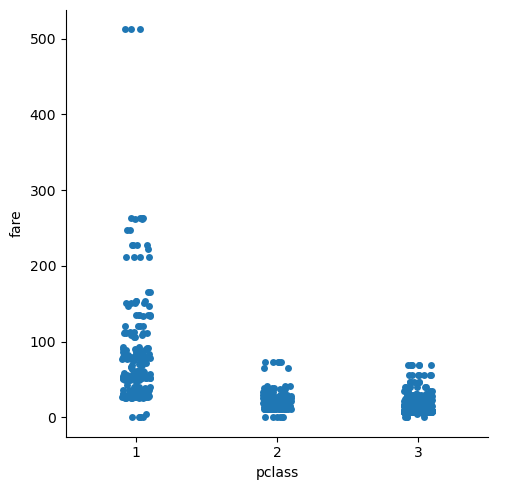

In [25]:
sns.catplot(df, x = 'pclass', y = 'fare', )

<span class="theorem-title">**Exercise 21**</span> Create a bar plot for
the same data by using the `kind` argument.

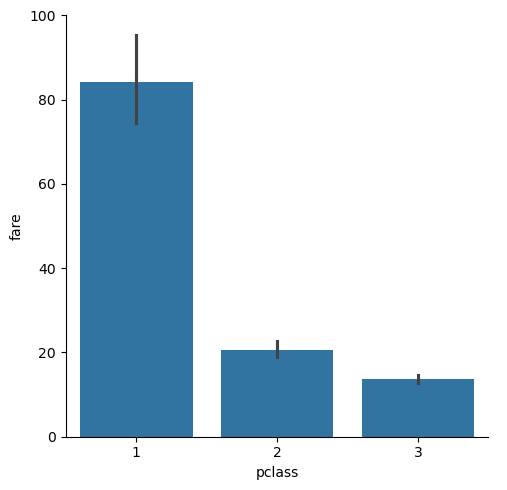

In [26]:
sns.catplot(df, x = 'pclass', y = 'fare', kind='bar')

<span class="theorem-title">**Exercise 22**</span> Add a color or `hue`
to the bar plot to encode passenger `sex`.

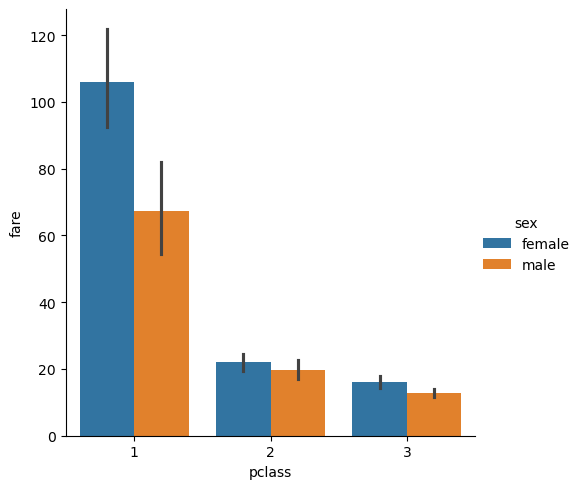

In [27]:
sns.catplot(df, x = 'pclass', y = 'fare', kind='bar', hue='sex')

### 4.2 Statistical Analysis with Pingouin

Pingouin is a library for performing statistical tests that is neatly
integrated with pandas. In this section we are going to use Pingouin to
perform an analysis of variance (ANOVA) which is a test that compares
the variance between groups to the variance within groups with respect
to a specific variable. This allows us to estimate if the difference
between groups exceeds the “background noise” in the data. We are also
going to compute pairwise correlations for all variables in the data
set. By checking which variables are correlated, we can identify
possible confounds in our analysis.

| Code | Description |
|------------------------------------|------------------------------------|
| `import pingouin as pg` | Import the `pingouin` library under the alias `pg` |
| `pg.anova(data=df, dv="var1", between="var2")` | Perform an analysis of variance (ANOVA) to check if the difference in `"var1"` between groups in `"var2"` exceeds the variance within each group of `"var2"` |
| `pg.pairwise_corr(data=df)` | Compute pairwise correlations for all |

<span class="theorem-title">**Exercise 24**</span> Import the `pingouin`
library under the alias `pg`.

In [28]:
import pingouin as pg

<span class="theorem-title">**Example 4**</span> Perform an analysis
of variance (ANOVA) to check if the variance in `"fare"` between
`"embark_town"`s exceeds the variance within each `"embark_town"`.

In [29]:
pg.anova(df, dv='fare', between='embark_town')

,Source,ddof1,ddof2,F,p-unc,np2
0,embark_town,2,886,38.140305,1.289645e-16,0.079271


<span class="theorem-title">**Exercise 25**</span> Perform an analysis
of variance (ANOVA) to check if the variance in `"age"` between
`"pclass"`es exceeds the variance within each `"pclass"`.

In [30]:
pg.anova(df, dv='age', between='pclass')

,Source,ddof1,ddof2,F,p-unc,np2
0,pclass,2,711,57.443484,7.487984e-24,0.139107


<span class="theorem-title">**Exercise 26**</span> Calculate the
pairwise correlations for all columns in `df`. Assign the data frame
returned by `pg.pariwise_corr` to a new variable called `df_corr` and
print it

In [31]:
df_corr = pg.pairwise_corr(df, )
df_corr

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,survived,pclass,pearson,two-sided,891,-0.338481,"[-0.4, -0.28]",2.537047e-25,1.149e+22,1.000000
1,survived,age,pearson,two-sided,714,-0.077221,"[-0.15, -0.0]",3.912465e-02,0.392,0.541628
2,survived,fare,pearson,two-sided,891,0.257307,"[0.19, 0.32]",6.120189e-15,6.56e+11,1.000000
3,pclass,age,pearson,two-sided,714,-0.369226,"[-0.43, -0.3]",1.756699e-24,1.852e+21,1.000000
4,pclass,fare,pearson,two-sided,891,-0.549500,"[-0.59, -0.5]",1.967386e-71,7.243e+67,1.000000
5,age,fare,pearson,two-sided,714,0.096067,"[0.02, 0.17]",1.021628e-02,1.26,0.729450
